In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [3]:
mnist_data = pd.read_csv('datasets/train.csv')

mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_data.shape

(42000, 785)

In [5]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
mnist_features = mnist_data.drop('label', axis=1)

mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_labels = mnist_data['label']

mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
        
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  0


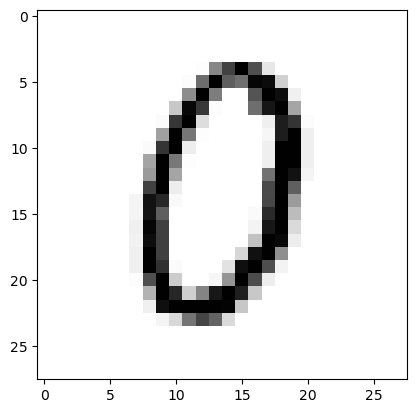

In [9]:
display_image(5)

Digit:  6


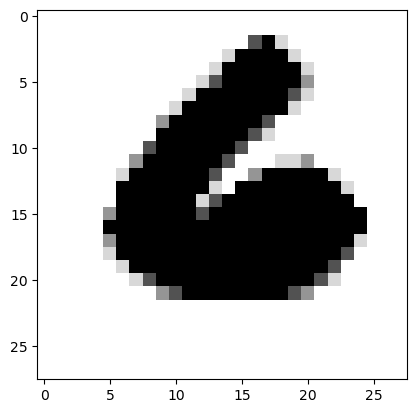

In [10]:
display_image(500)

In [11]:
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
kmeans_centroids.shape

(10, 784)

/var/folders/fq/rmcf4vf118l0xb72bpz0jzk40000gn/T/ipykernel_6594/59258134.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, centroid + 1)


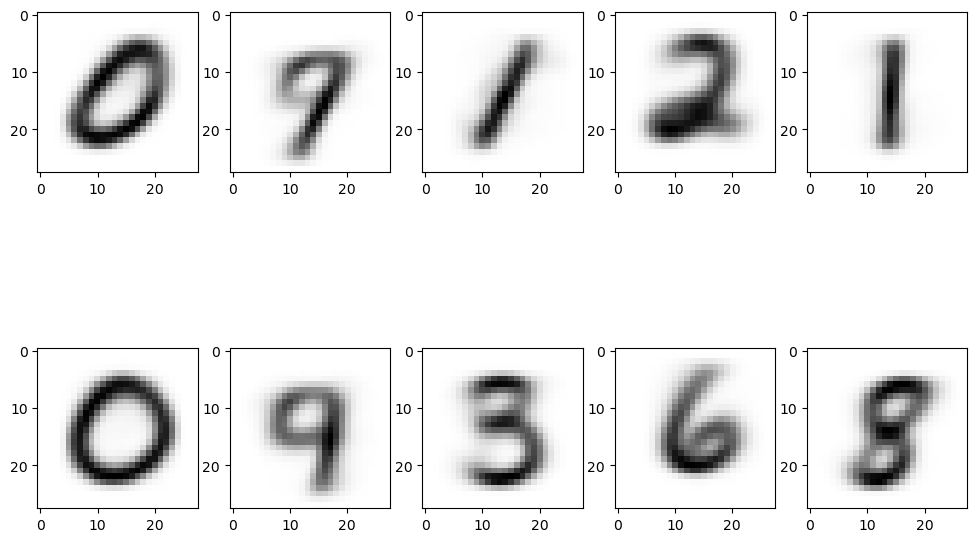

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

In [15]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [16]:
mnist_test = mnist_data.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

In [17]:
mnist_test_labels

33516    0
12165    4
26644    9
6329     8
11885    2
1950     6
38619    1
7858     1
24901    1
38217    6
Name: label, dtype: int64

In [18]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([0, 4, 9, 8, 2, 6, 1, 1, 1, 6])

In [19]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In [20]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,0,9
1,4,2
2,9,1
3,8,9
4,2,3
5,6,8
6,1,2
7,1,4
8,1,2
9,6,8


### MiniBatchKMeans is faster for larger datasets

In [21]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [22]:
minibatch_kmeans_centroids = kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

/var/folders/fq/rmcf4vf118l0xb72bpz0jzk40000gn/T/ipykernel_6594/3539730860.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, centroid + 1)


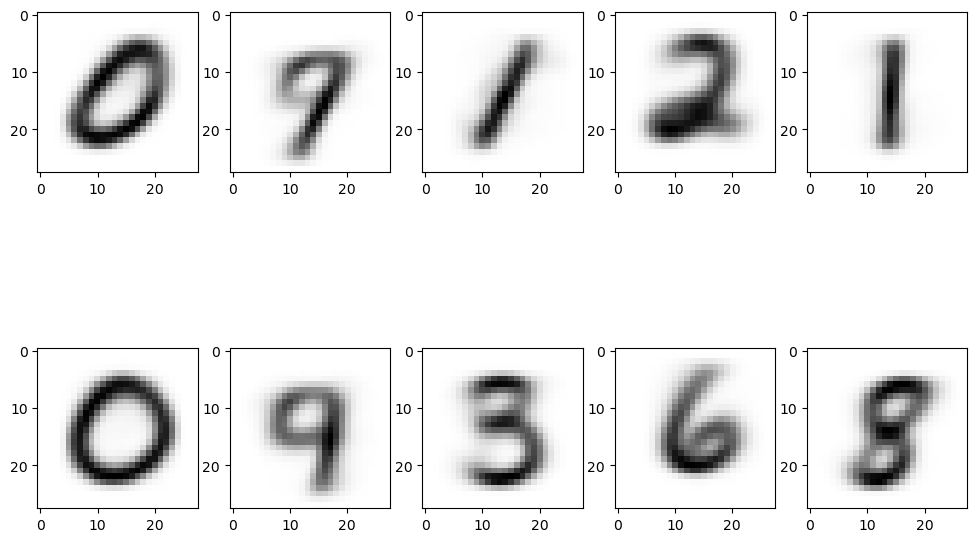

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')